# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

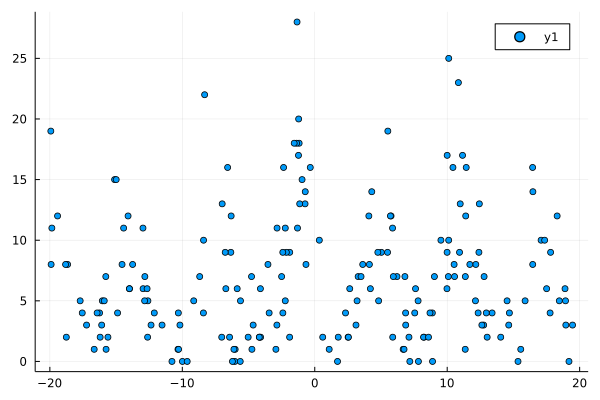

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -628.6880812846929
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.309058 seconds (6.19 M allocations: 409.156 MiB, 2.20% gc time, 97.84% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.22537018304789322, 0.4380420274694068, 0.3871946915216408, 0.2742553407976777, 0.15965899021783084, 0.20585268788970443, 0.22043337654795125, 0.41062760227217016, 0.5542570030410503, 0.33319682461225003  …  0.304507512095296, 0.29347663971540655, 0.3132070991838922, 0.20969595076015413, 0.2892575168169274, 0.5538201222190564, 0.2933223848724327, 0.4255729545495238, 0.29584776052941375, 0.3404017791674504], θ = [3.9831549804444806, 8.858798161464783, 10.370757491940614, 5.9626727395946935, 3.492584030465124, 5.978901735526312, 4.979851699402183, 4.43781764251607, 9.751626583082114, 8.422224100566432  …  4.46554761456707, 7.943071243458709, 5.455474836851298, 4.483582540805555, 4.468884103879605, 8.776805705379527, 6.950239242050141, 6.896230131176668, 7.9421556370019495, 2.9713634330264584]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTup

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -688.0611203664953
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.423591 seconds (4.22 M allocations: 314.340 MiB, 2.55% gc time, 96.62% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.804531925712386) infered by Analytic Variational Inference , (local_vars = (c = [0.398560840017228, 0.34795411745727595, 0.27165167255712064, 0.1816082013742963, 0.26830324954629914, 0.2015277500785138, 0.21728971500094194, 0.6244586748945178, 0.5139699046735378, 0.1999130610373896  …  0.4909042530956557, 0.16011260536606067, 0.19130942300813808, 0.3401760783851089, 0.44180151663379064, 0.5122034258958866, 0.16510547786964752, 0.3264599472222823, 0.15852207922275766, 0.5643217301447637], θ = [5.768692388473895, 9.49888497251559, 11.221353082774327, 7.126050864714074, 5.082327365796854, 7.389771777103137, 6.386569397203045, 6.542127389414196, 10.064954969016611, 9.374664575788383  …  6.353400306363896, 8.99821207221293, 6.477736911318065, 6.1501880165393175, 6.269243234795039, 9.088142514513661, 8.017706884797104, 7.57104452423781, 8.980949537384642, 5.023115942231211], γ = [8.689708799514753, 6.1890592229094805, 6.58054932

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

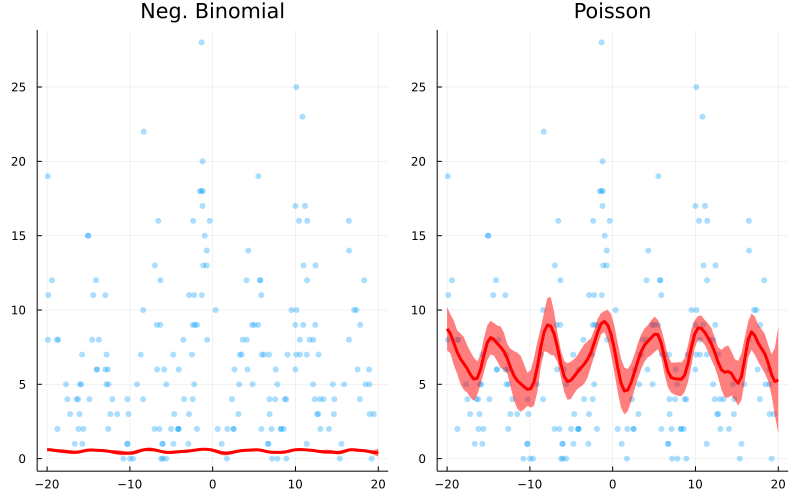

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*